Aperçu des données :


,post_id,date,platform,content_type,likes,comments,shares,reach,impressions
0,1,2025-01-15 09:00:00,Instagram,carousel,450,23,12,8500,12000
1,2,2025-01-15 14:00:00,Facebook,image,320,15,8,6200,9500
2,3,2025-01-15 18:00:00,LinkedIn,article,180,42,25,5400,7800
3,4,2025-01-16 10:00:00,Instagram,reel,890,67,45,15000,22000
4,5,2025-01-16 13:00:00,Twitter,text,210,34,56,7800,11000



Colonnes du dataset : ['post_id', 'date', 'platform', 'content_type', 'likes', 'comments', 'shares', 'reach', 'impressions']

Reach moyen : 10193.33
Meilleur horaire de publication : 16h


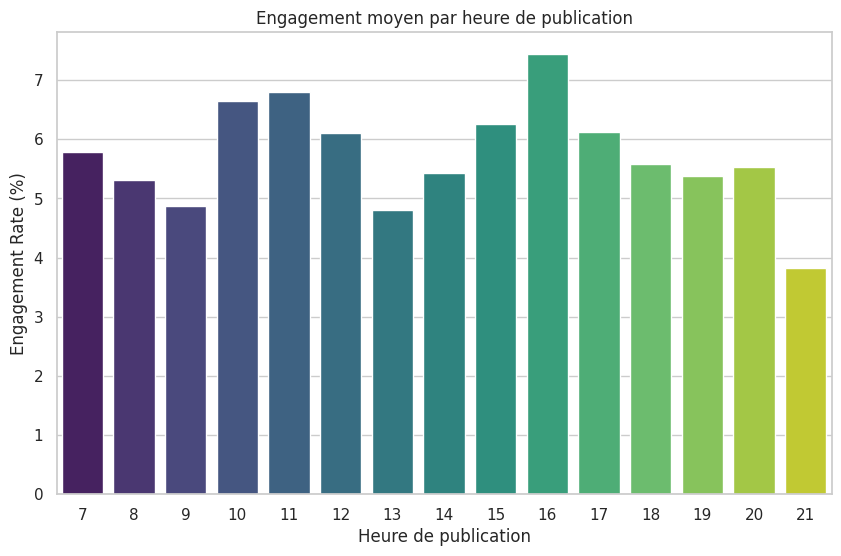

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

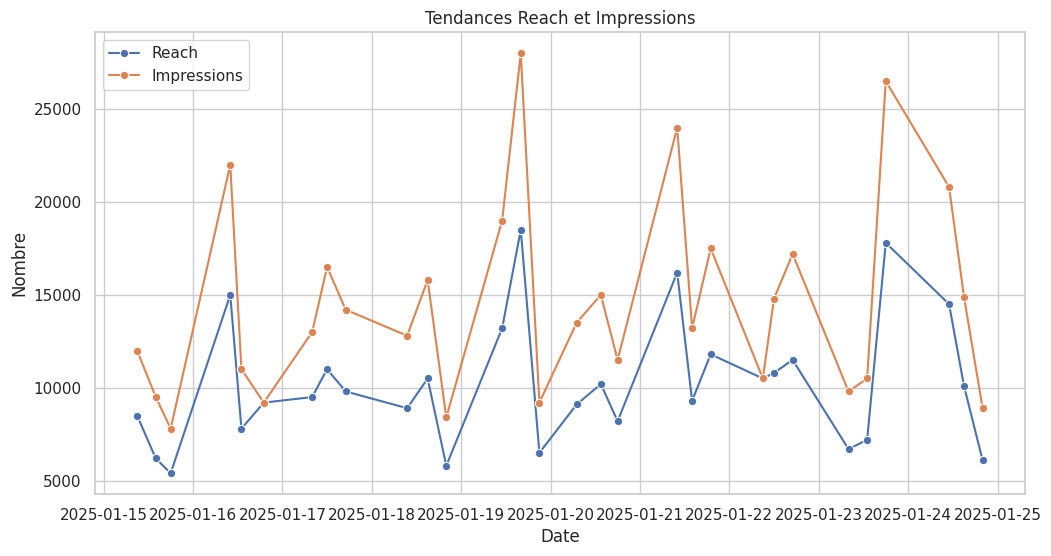


--- Questions théoriques ---

1. Pourquoi utiliser first-party cookies plutôt que third-party ?
- First-party cookies : créés et lus par le site visité. Plus fiables et respectueux de la vie privée.
- Third-party cookies : créés par un service externe. Souvent bloqués, moins fiables, RGPD restrictif.

2. Différence entre pixel synchrone et asynchrone :
- Pixel synchrone : la page attend le chargement du pixel, peut ralentir l'affichage.
- Pixel asynchrone : se charge en parallèle, n'affecte pas le rendu, meilleure expérience utilisateur.


In [15]:
# ==============================
# Notebook corrigé : Analyse des posts sociaux
# ==============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

# ==============================
# 1. Charger le dataset CSV
# ==============================
df = pd.read_csv('/kaggle/input/dataseet/social_posts.csv')
print("Aperçu des données :")
display(df.head())

# Vérifier les colonnes disponibles
print("\nColonnes du dataset :", df.columns.tolist())

# ==============================
# 2. Calculer les métriques clés
# ==============================
df['engagement_rate'] = ((df['likes'] + df['comments'] + df['shares']) / df['reach']) * 100
mean_reach = df['reach'].mean()
print(f"\nReach moyen : {mean_reach:.2f}")

# ==============================
# 3. Identifier les meilleurs horaires de publication
# ==============================
# Convertir la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'])

# Extraire l'heure de publication
df['hour_post'] = df['date'].dt.hour

# Calculer l'engagement moyen par heure
hourly_engagement = df.groupby('hour_post')['engagement_rate'].mean()

# Meilleur horaire
best_hour = hourly_engagement.idxmax()
print(f"Meilleur horaire de publication : {best_hour}h")

# ==============================
# 4. Visualiser les tendances
# ==============================
# Engagement rate par heure
plt.figure(figsize=(10,6))
sns.barplot(x=hourly_engagement.index, y=hourly_engagement.values, palette="viridis")
plt.title("Engagement moyen par heure de publication")
plt.xlabel("Heure de publication")
plt.ylabel("Engagement Rate (%)")
plt.show()

# Tendances reach et impressions dans le temps
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='reach', label='Reach', marker='o')
sns.lineplot(data=df, x='date', y='impressions', label='Impressions', marker='o')
plt.title("Tendances Reach et Impressions")
plt.xlabel("Date")
plt.ylabel("Nombre")
plt.legend()
plt.show()

# ==============================
# 5. Réponses aux questions théoriques
# ==============================
print("\n--- Questions théoriques ---\n")
print("1. Pourquoi utiliser first-party cookies plutôt que third-party ?")
print("- First-party cookies : créés et lus par le site visité. Plus fiables et respectueux de la vie privée.")
print("- Third-party cookies : créés par un service externe. Souvent bloqués, moins fiables, RGPD restrictif.\n")

print("2. Différence entre pixel synchrone et asynchrone :")
print("- Pixel synchrone : la page attend le chargement du pixel, peut ralentir l'affichage.")
print("- Pixel asynchrone : se charge en parallèle, n'affecte pas le rendu, meilleure expérience utilisateur.")
